In [8]:
import os
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix
from deepface import DeepFace

In [9]:
dataset_path = "/kaggle/input/gggggg/"
results = []

In [10]:
#function to categorize age in 5-year intervals
def find_agebucket(age):
    age = int(age)
    if 0 <= age <= 1:
        return '0-1 years'#Infants
    elif 2 <= age <= 4:
        return '2-4 years' #Toddlers
    elif 5 <= age <= 12:
        return '5-12 years' #Children
    elif 13 <= age <= 19:
        return '13-19 years'#Teenagers
    elif 20 <= age <= 29:
        return '20-29 years' #Young Adults
    elif 30 <= age <= 39:
        return '30-39 years'
    elif 40 <= age <= 49:
        return '40-49 years'
    elif 50 <= age <= 59:
        return '50-59 years'
    elif 60 <= age <= 64:
        return '60-64 years'
    elif 65 <= age <= 69:
        return '65-69 years'
    elif 70 <= age <= 79:
        return '70-79 years'
    elif age >= 80:
        return '80+ years'
    else:
        return 'NA' #сatch unknown values

#race categories mapping
race_mapping = {0: "white", 1: "black", 2: "asian", 3: "indian", 4: "middle eastern", 5:"latino hispanic"}

In [11]:
#get all images with these kind of extensions
image_files = [f for f in os.listdir(dataset_path) if f.endswith(('.jpg', '.png', '.jpeg'))]

#ensure we have images to process
if not image_files:
    print("No images found in the dataset folder.")
else:
    for img_name in image_files:
        img_path = os.path.join(dataset_path, img_name)

        try:
            #will extract true labels from filename(like  13_1_2.jpg -> Age=13, Gender=1, Race=2)
            parts = img_name.split("_")
            true_age = int(parts[0])
            true_gender = "Woman" if int(parts[1]) == 1 else "Man"
            true_race = race_mapping.get(int(parts[2][0]), "Unknown")

            #loading and convert image
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            #DeepFace analysis
            analysis = DeepFace.analyze(img_rgb, actions=['age', 'gender', 'race'], enforce_detection=False)

            #extract attributes
            predicted_age = analysis[0]['age']
            age_category = find_agebucket(predicted_age)
            predicted_gender = max(analysis[0]['gender'], key=analysis[0]['gender'].get)
            predicted_race = analysis[0]['dominant_race']

            #store results
            results.append({
                "Image Path": img_path,
                "True Age": true_age,
                "Predicted Age": predicted_age,
                "Age Category": age_category,
                "True Gender": true_gender,
                "Predicted Gender": predicted_gender,
                "True Race": true_race,
                "Predicted Race": predicted_race
            })

            print(f"Processed {img_name}: True Age={true_age}, Predicted Age={predicted_age}, "
                  f"True Gender={true_gender}, Predicted Gender={predicted_gender}, "
                  f"True Race={true_race}, Predicted Race={predicted_race}")

        except Exception as e:
            print(f"Error processing {img_name}: {str(e)}")


Action: age:   0%|          | 0/3 [00:00<?, ?it/s]    

25-03-04 11:39:56 - age_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/age_model_weights.h5
To: /root/.deepface/weights/age_model_weights.h5

  0%|          | 0.00/539M [00:00<?, ?B/s]
  2%|▏         | 12.1M/539M [00:00<00:04, 120MB/s]
  7%|▋         | 39.8M/539M [00:00<00:02, 212MB/s]
 12%|█▏        | 66.6M/539M [00:00<00:01, 237MB/s]
 19%|█▉        | 101M/539M [00:00<00:01, 279MB/s] 
 25%|██▌       | 137M/539M [00:00<00:01, 306MB/s]
 32%|███▏      | 172M/539M [00:00<00:01, 322MB/s]
 39%|███▊      | 208M/539M [00:00<00:00, 333MB/s]
 45%|████▍     | 242M/539M [00:00<00:00, 327MB/s]
 51%|█████     | 275M/539M [00:00<00:00, 313MB/s]
 57%|█████▋    | 306M/539M [00:01<00:00, 266MB/s]
 62%|██████▏   | 334M/539M [00:01<00:00, 269MB/s]
 69%|██████▉   | 372M/539M [00:01<00:00, 300MB/s]
 76%|███████▌  | 407M/539M [00:01<00:00, 312MB/s]
 82%|████████▏ | 444M/539M [00:01<00:00, 327MB/s]
 89%|████████▊ | 478M/539M [00:01<00:00, 295MB/s]
 94%|█████████▍| 509M/539M [00:01<00:00, 292

25-03-04 11:40:02 - gender_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/gender_model_weights.h5
To: /root/.deepface/weights/gender_model_weights.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 11.0M/537M [00:00<00:05, 103MB/s]
  4%|▍         | 21.5M/537M [00:00<00:06, 74.4MB/s]
 10%|█         | 54.5M/537M [00:00<00:02, 168MB/s] 
 14%|█▍        | 73.9M/537M [00:00<00:02, 177MB/s]
 19%|█▉        | 103M/537M [00:00<00:02, 215MB/s] 
 24%|██▎       | 126M/537M [00:00<00:02, 164MB/s]
 27%|██▋       | 145M/537M [00:00<00:02, 145MB/s]
 30%|███       | 162M/537M [00:01<00:02, 135MB/s]
 33%|███▎      | 177M/537M [00:01<00:02, 129MB/s]
 36%|███▌      | 191M/537M [00:01<00:02, 125MB/s]
 38%|███▊      | 204M/537M [00:01<00:03, 96.5MB/s]
 40%|████      | 215M/537M [00:01<00:03, 84.3MB/s]
 42%|████▏     | 225M/537M [00:01<00:04, 77.3MB/s]
 43%|████▎     | 233M/537M [00:02<00:04, 72.6MB/s]
 45%|████▍     | 241M/537M [00:02<00:04, 68.1MB/s]
 46%|████▋     | 249M/537M [00

25-03-04 11:40:22 - race_model_single_batch.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/race_model_single_batch.h5
To: /root/.deepface/weights/race_model_single_batch.h5

  0%|          | 0.00/537M [00:00<?, ?B/s]
  2%|▏         | 12.6M/537M [00:00<00:04, 125MB/s]
  8%|▊         | 41.4M/537M [00:00<00:02, 220MB/s]
 13%|█▎        | 67.6M/537M [00:00<00:01, 236MB/s]
 19%|█▉        | 102M/537M [00:00<00:01, 278MB/s] 
 24%|██▍       | 131M/537M [00:00<00:01, 274MB/s]
 31%|███       | 165M/537M [00:00<00:01, 296MB/s]
 36%|███▌      | 195M/537M [00:00<00:01, 272MB/s]
 41%|████▏     | 222M/537M [00:00<00:01, 262MB/s]
 48%|████▊     | 256M/537M [00:00<00:00, 282MB/s]
 54%|█████▍    | 293M/537M [00:01<00:00, 306MB/s]
 60%|██████    | 324M/537M [00:01<00:00, 300MB/s]
 67%|██████▋   | 358M/537M [00:01<00:00, 310MB/s]
 72%|███████▏  | 389M/537M [00:01<00:00, 286MB/s]
 78%|███████▊  | 418M/537M [00:01<00:00, 282MB/s]
 83%|████████▎ | 447M/537M [00:01<00:00, 280MB/s]
 89%|████████▊ | 476M/537M [00:0

Processed 18_0_2.jpg: True Age=18, Predicted Age=32, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.83it/s]  


Processed 3_0_2.jpg: True Age=3, Predicted Age=21, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Processed 64_1_2.jpg: True Age=64, Predicted Age=37, True Gender=Woman, Predicted Gender=Man, True Race=asian, Predicted Race=indian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.58it/s]  


Processed 20_1_2.jpg: True Age=20, Predicted Age=29, True Gender=Woman, Predicted Gender=Woman, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.17it/s]  


Processed 23_1_5.jpg: True Age=23, Predicted Age=31, True Gender=Woman, Predicted Gender=Woman, True Race=latino hispanic, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]  


Processed 43_1_0.jpg: True Age=43, Predicted Age=33, True Gender=Woman, Predicted Gender=Woman, True Race=white, Predicted Race=white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.78it/s]  


Processed 25_0_3.jpg: True Age=25, Predicted Age=29, True Gender=Man, Predicted Gender=Man, True Race=indian, Predicted Race=latino hispanic


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.64it/s]  


Processed 19_0_2.jpg: True Age=19, Predicted Age=22, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.76it/s]  


Processed 39_0_2.jpg: True Age=39, Predicted Age=33, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.82it/s]  


Processed 30_0_2.jpg: True Age=30, Predicted Age=22, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.70it/s]  


Processed 33_0_0.jpg: True Age=33, Predicted Age=28, True Gender=Man, Predicted Gender=Man, True Race=white, Predicted Race=white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]  


Processed 34_1_2.jpg: True Age=34, Predicted Age=30, True Gender=Woman, Predicted Gender=Woman, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.39it/s]  


Processed 18_1_2.jpg: True Age=18, Predicted Age=26, True Gender=Woman, Predicted Gender=Woman, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.52it/s]  


Processed 17_0_2.jpg: True Age=17, Predicted Age=26, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]  


Processed 9_0_2.jpg: True Age=9, Predicted Age=28, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]  


Processed 12_1_1.jpg: True Age=12, Predicted Age=28, True Gender=Woman, Predicted Gender=Man, True Race=black, Predicted Race=black


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.88it/s]  


Processed 58_1_2.jpg: True Age=58, Predicted Age=40, True Gender=Woman, Predicted Gender=Man, True Race=asian, Predicted Race=white


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.98it/s]  


Processed 27_0_1.jpg: True Age=27, Predicted Age=27, True Gender=Man, Predicted Gender=Man, True Race=black, Predicted Race=black


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.92it/s]  


Processed 21_1_2.jpg: True Age=21, Predicted Age=30, True Gender=Woman, Predicted Gender=Woman, True Race=asian, Predicted Race=asian


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Processed 16_0_4.jpg: True Age=16, Predicted Age=21, True Gender=Man, Predicted Gender=Man, True Race=middle eastern, Predicted Race=latino hispanic


Action: race: 100%|██████████| 3/3 [00:00<00:00,  3.00it/s]  


Processed 26_1_4.jpg: True Age=26, Predicted Age=25, True Gender=Woman, Predicted Gender=Woman, True Race=middle eastern, Predicted Race=middle eastern


Action: race: 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]  

Processed 13_0_2.jpg: True Age=13, Predicted Age=27, True Gender=Man, Predicted Gender=Man, True Race=asian, Predicted Race=asian


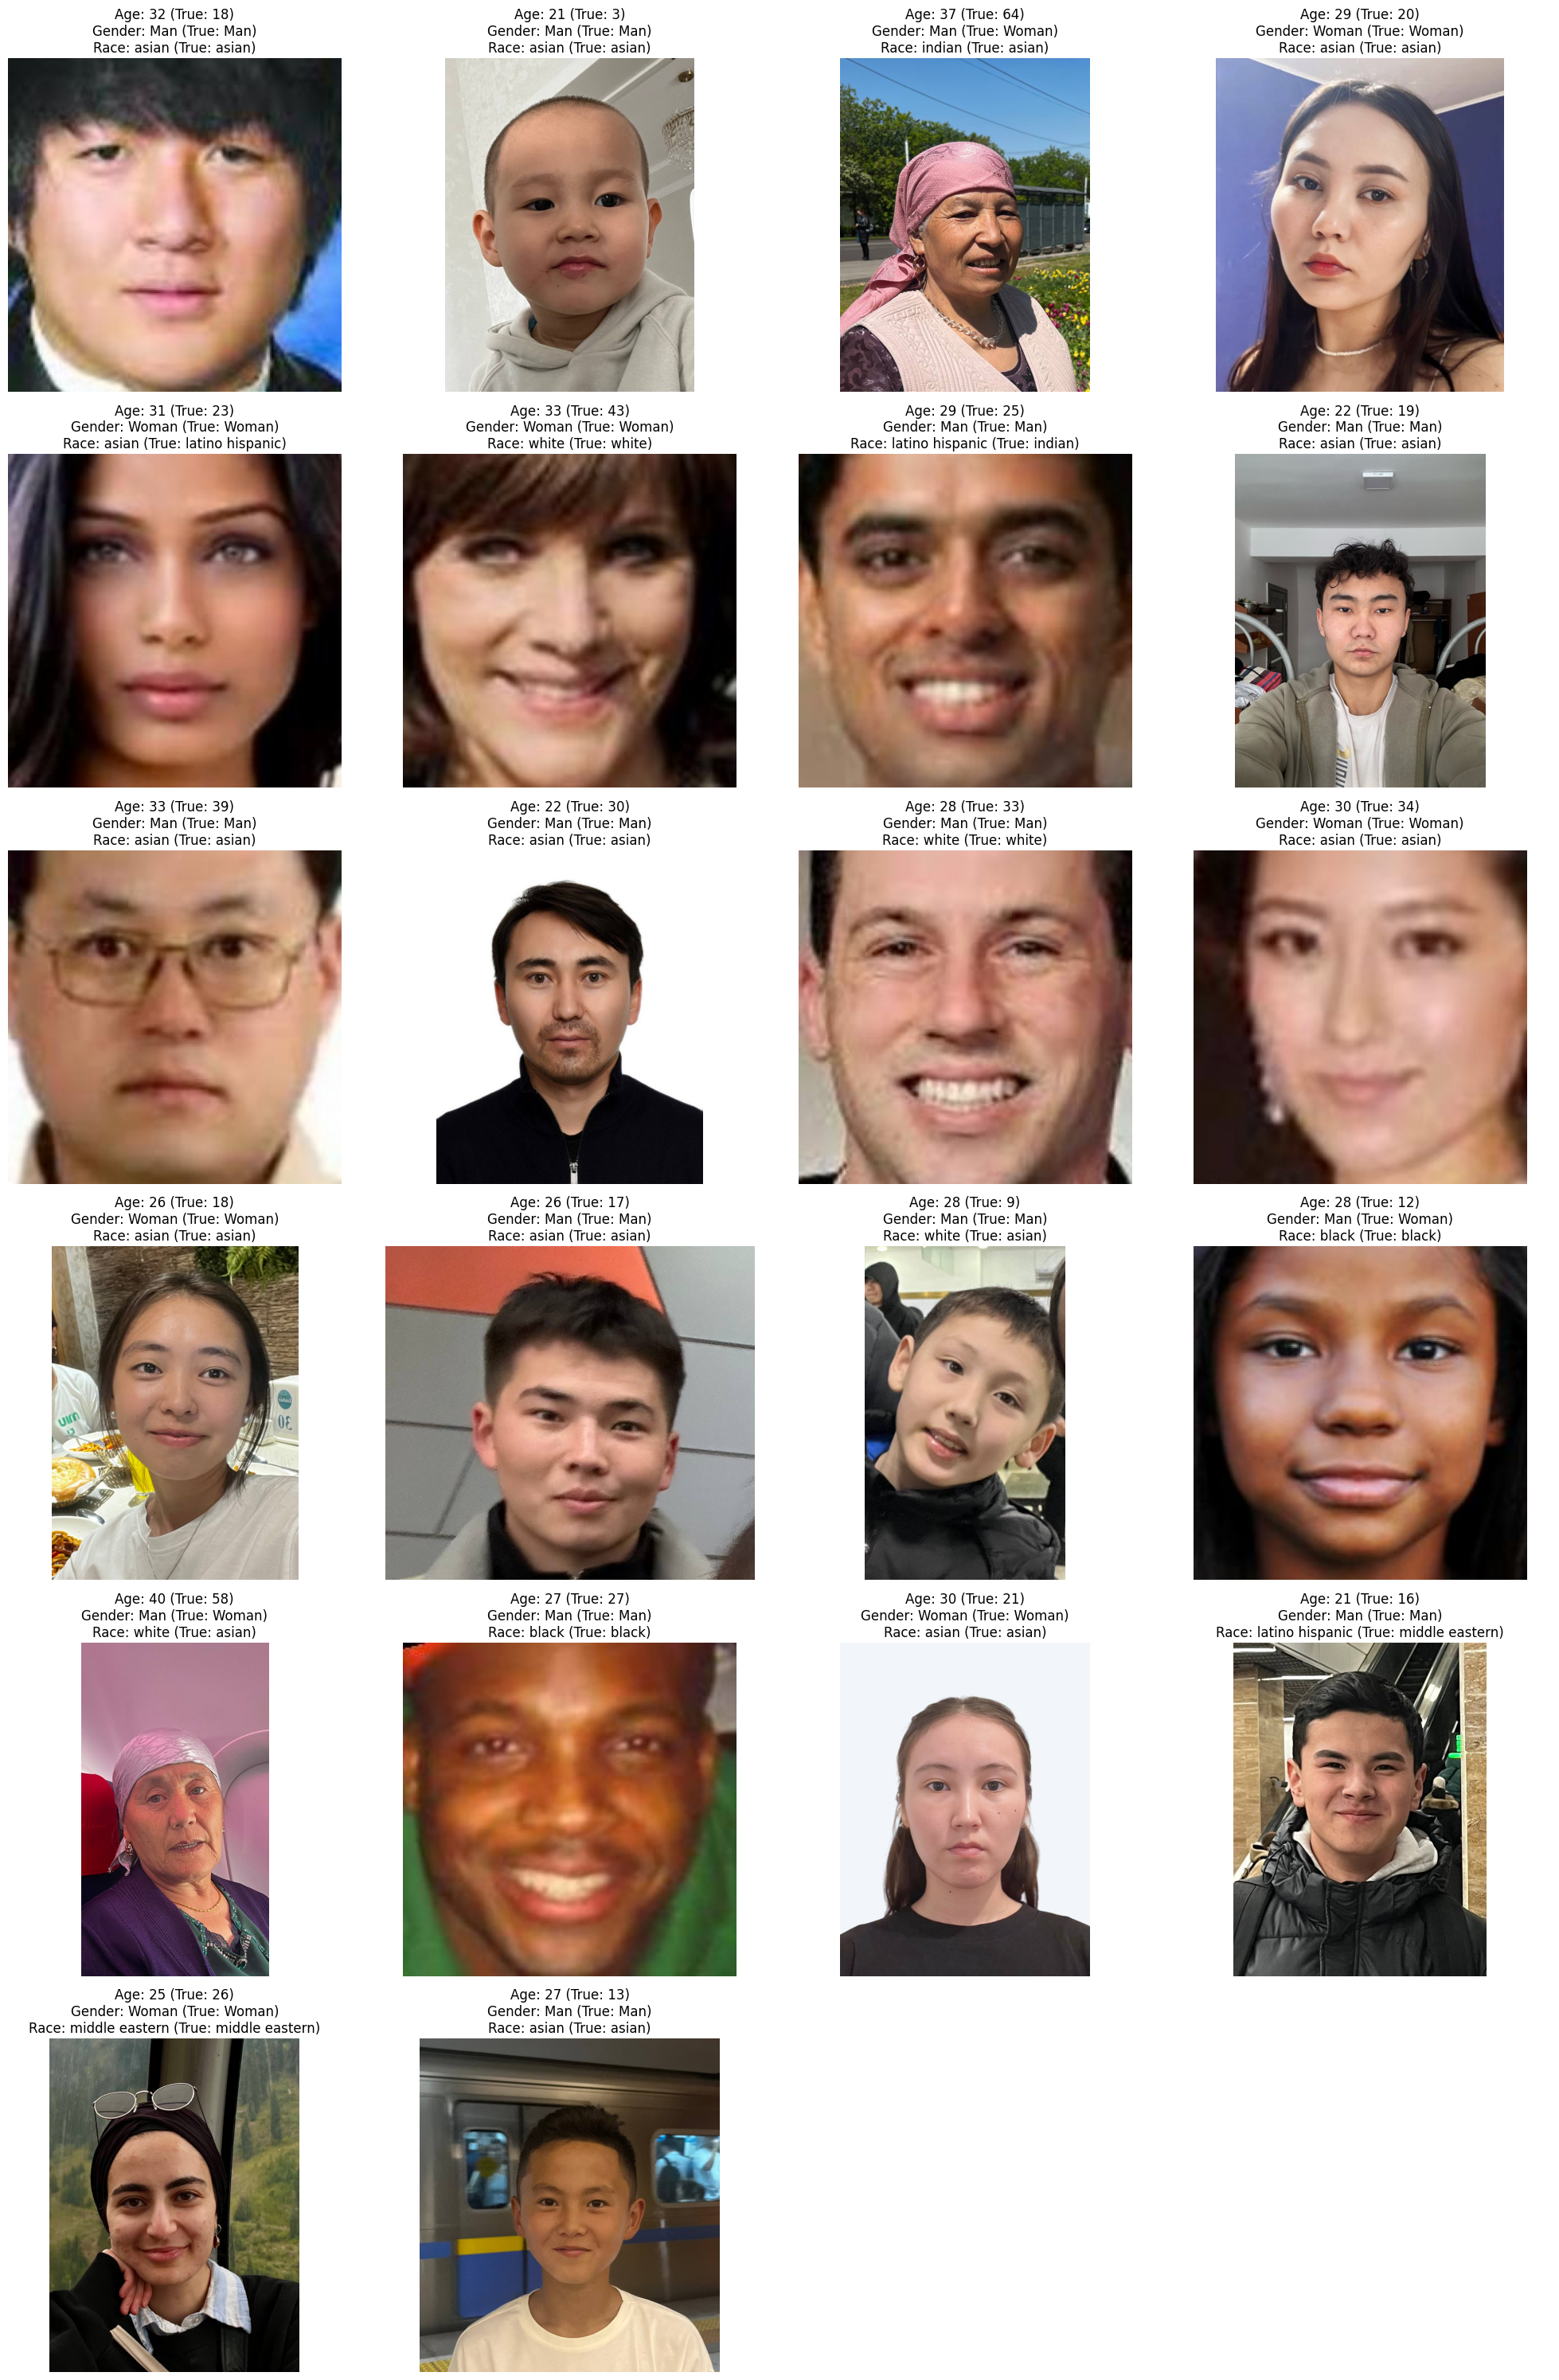

In [12]:
#remove duplicate entries based on image Path
unique_results = {result["Image Path"]: result for result in results}.values()
unique_results = list(unique_results)  #convert back to list

#number of images per row
num_cols = 4
num_images = len(unique_results)
num_rows = (num_images // num_cols) + (num_images % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

#display images
for i, result in enumerate(unique_results):
    img_path = result["Image Path"]
    img = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #set labels
    age_text = f"Age: {result['Predicted Age']} (True: {result['True Age']})"
    gender_text = f"Gender: {result['Predicted Gender']} (True: {result['True Gender']})"
    race_text = f"Race: {result['Predicted Race']} (True: {result['True Race']})"

    axes[i].imshow(img_rgb)
    axes[i].axis("off")
    axes[i].set_title(f"{age_text}\n{gender_text}\n{race_text}")

#hide unused axes if fewer images than expected
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Adjusted Age Category Prediction Accuracy: 40.91%
Gender Prediction Accuracy: 86.36%
Race Prediction Accuracy: 72.73%


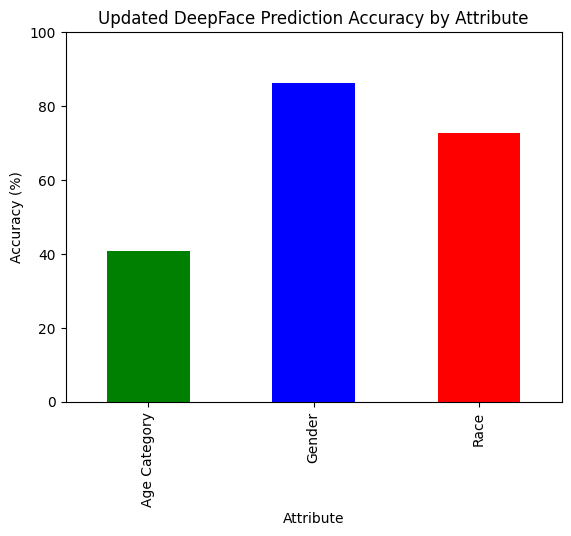

In [13]:
df = pd.DataFrame(results)

def age_category_match(true_age, predicted_age):
    true_category = find_agebucket(true_age)
    predicted_category = find_agebucket(predicted_age)
    return (true_category == predicted_category) or (abs(true_age - predicted_age) <= 5)

df["Age Category Match"] = df.apply(lambda row: age_category_match(row["True Age"], row["Predicted Age"]), axis=1)
age_category_adjusted_accuracy = df["Age Category Match"].mean()

gender_accuracy = accuracy_score(df["True Gender"], df["Predicted Gender"])
race_accuracy = accuracy_score(df["True Race"], df["Predicted Race"])

print(f"Adjusted Age Category Prediction Accuracy: {age_category_adjusted_accuracy:.2%}")
print(f"Gender Prediction Accuracy: {gender_accuracy:.2%}")
print(f"Race Prediction Accuracy: {race_accuracy:.2%}")

df_accuracy = pd.DataFrame({
    "Attribute": ["Age Category", "Gender", "Race"],
    "Accuracy (%)": [
        age_category_adjusted_accuracy * 100, 
        gender_accuracy * 100, 
        race_accuracy * 100
    ]
})

df_accuracy.plot(kind="bar", x="Attribute", y="Accuracy (%)", legend=False, color=["green", "blue", "red"])
plt.ylabel("Accuracy (%)")
plt.title("Updated DeepFace Prediction Accuracy by Attribute")
plt.ylim(0, 100)
plt.show()

#df.to_csv("/kaggle/working/DeepFace_Results.csv", index=False)
#df_accuracy.to_csv("/kaggle/working/DeepFace_Accuracy.csv", index=False)

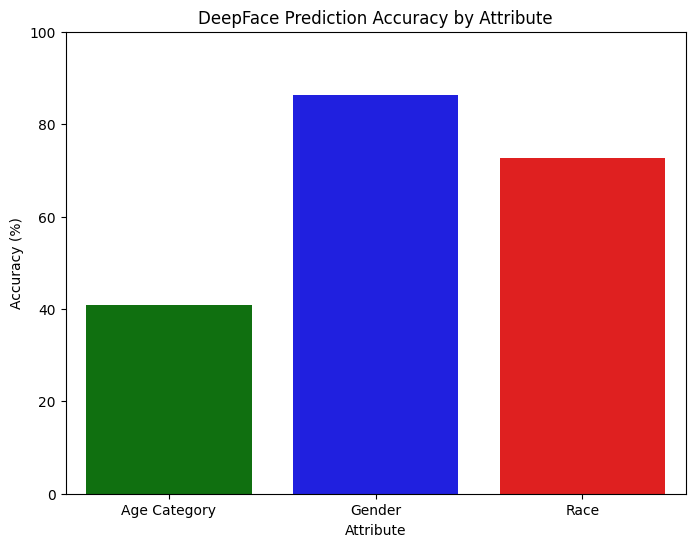

In [14]:
df_accuracy = pd.DataFrame({
    "Attribute": ["Age Category", "Gender", "Race"],
    "Accuracy (%)": [age_category_adjusted_accuracy * 100, gender_accuracy * 100, race_accuracy * 100]
})

plt.figure(figsize=(8, 6))
sns.barplot(x=df_accuracy["Attribute"], y=df_accuracy["Accuracy (%)"], palette=["green", "blue", "red"])
plt.ylabel("Accuracy (%)")
plt.title("DeepFace Prediction Accuracy by Attribute")
plt.ylim(0, 100)
plt.show()

In [15]:
#convert True Age and Predicted Age into Age Categories before computing confusion matrix
df["True Age Category"] = df["True Age"].apply(find_agebucket)
df["Predicted Age Category"] = df["Predicted Age"].apply(find_agebucket)

#recompute the Age category confusion matrix
age_confusion = confusion_matrix(df["True Age Category"], df["Predicted Age Category"])

Available columns in df: Index(['Image Path', 'True Age', 'Predicted Age', 'Age Category',
       'True Gender', 'Predicted Gender', 'True Race', 'Predicted Race',
       'Age Category Match', 'True Age Category', 'Predicted Age Category'],
      dtype='object')


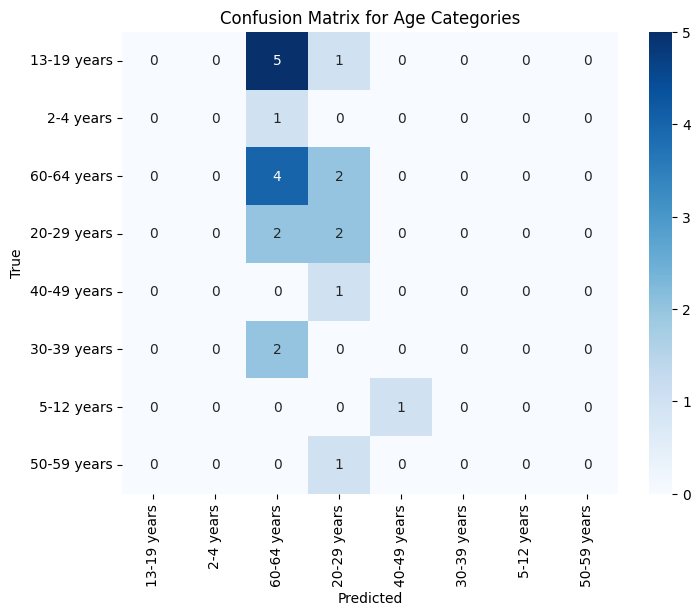

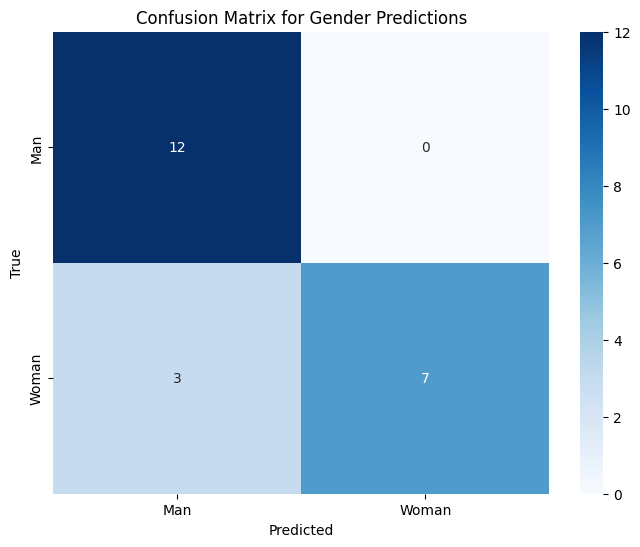

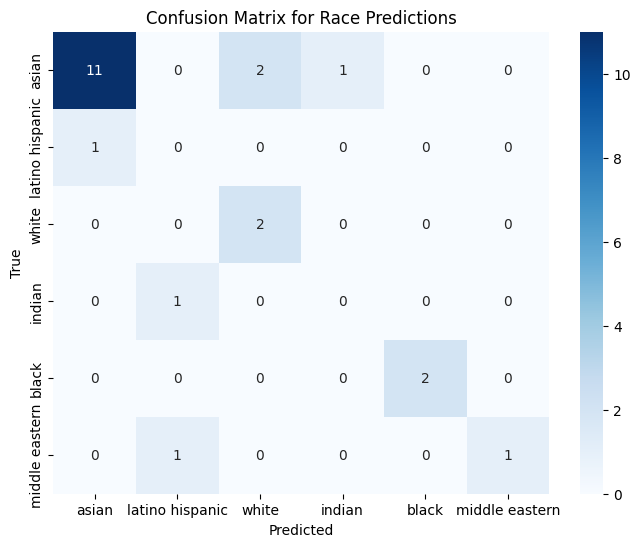

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

print("Available columns in df:", df.columns)

#convert True Age and Predicted Age into age categories before computing confusion matrix
df["True Age Category"] = df["True Age"].apply(find_agebucket)
df["Predicted Age Category"] = df["Predicted Age"].apply(find_agebucket)

#ensure the correct column names
true_age_col = "True Age Category" if "True Age Category" in df.columns else None
predicted_age_col = "Predicted Age Category" if "Predicted Age Category" in df.columns else None
true_gender_col = "True Gender" if "True Gender" in df.columns else None
predicted_gender_col = "Predicted Gender" if "Predicted Gender" in df.columns else None
true_race_col = "True Race" if "True Race" in df.columns else None
predicted_race_col = "Predicted Race" if "Predicted Race" in df.columns else None

#confusion matrices for Age Category, Gender, and Race
if true_age_col and predicted_age_col:
    age_confusion = confusion_matrix(df[true_age_col], df[predicted_age_col])
else:
    age_confusion = None
    print("Warning: Age columns not found in DataFrame.")

if true_gender_col and predicted_gender_col:
    gender_confusion = confusion_matrix(df[true_gender_col], df[predicted_gender_col], labels=["Man", "Woman"])
else:
    gender_confusion = None
    print("Warning: Gender columns not found in DataFrame.")

if true_race_col and predicted_race_col:
    race_confusion = confusion_matrix(df[true_race_col], df[predicted_race_col], labels=df[true_race_col].unique())
else:
    race_confusion = None
    print("Warning: Race columns not found in DataFrame.")

#Function to confusion matrices
def plot_confusion_matrix(conf_matrix, labels, title):
    if conf_matrix is not None:
        plt.figure(figsize=(8, 6))
        sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title(title)
        plt.show()

#Plot confusion matrices
if age_confusion is not None:
    plot_confusion_matrix(age_confusion, df[true_age_col].unique(), "Confusion Matrix for Age Categories")

if gender_confusion is not None:
    plot_confusion_matrix(gender_confusion, ["Man", "Woman"], "Confusion Matrix for Gender Predictions")

if race_confusion is not None:
    plot_confusion_matrix(race_confusion, df[true_race_col].unique(), "Confusion Matrix for Race Predictions")


In [27]:
from sklearn.metrics import precision_score, recall_score, mean_absolute_error

#ensure "True Age Category" and "Predicted Age Category" exist
df["True Age Category"] = df["True Age"].apply(find_agebucket)
df["Predicted Age Category"] = df["Predicted Age"].apply(find_agebucket)

#precision and recall for Gender
gender_precision = precision_score(df["True Gender"], df["Predicted Gender"], average='weighted')
gender_recall = recall_score(df["True Gender"], df["Predicted Gender"], average='weighted')

# precision and recall for Race
race_precision = precision_score(df["True Race"], df["Predicted Race"], average='weighted')
race_recall = recall_score(df["True Race"], df["Predicted Race"], average='weighted')

# precision and recall for Age using `age_category_adjusted_accuracy`
age_precision = age_category_adjusted_accuracy * 100
age_recall = age_category_adjusted_accuracy * 100

# MAE for Age Prediction using Categories
#convert age categories into numerical values for MAE calculation
age_categories = sorted(df["True Age Category"].unique())  #order consistency
age_mapping = {category: i for i, category in enumerate(age_categories)}

df["True Age Num"] = df["True Age Category"].map(age_mapping)
df["Predicted Age Num"] = df["Predicted Age Category"].map(age_mapping)

age_mae = mean_absolute_error(df["True Age Num"], df["Predicted Age Num"])

#MAE for Gender
df["True Gender Num"] = df["True Gender"].map({"Man": 0, "Woman": 1})
df["Predicted Gender Num"] = df["Predicted Gender"].map({"Man": 0, "Woman": 1})
gender_mae = mean_absolute_error(df["True Gender Num"], df["Predicted Gender Num"])

#MAE for Race
race_mapping = {race: i for i, race in enumerate(df["True Race"].unique())}
df["True Race Num"] = df["True Race"].map(race_mapping)
df["Predicted Race Num"] = df["Predicted Race"].map(race_mapping)
race_mae = mean_absolute_error(df["True Race Num"], df["Predicted Race Num"])

#results
df_metrics = pd.DataFrame({
    "Metric": ["Gender Precision", "Gender Recall", "Gender MAE",
               "Age Precision", "Age Recall", "Age MAE (Category-based)",
               "Race Precision", "Race Recall", "Race MAE"],
    "Score": [gender_precision  * 100, gender_recall  * 100 , gender_mae,
              age_precision, age_recall, age_mae,
              race_precision  * 100, race_recall  * 100, race_mae]
})

print(df_metrics)

                     Metric      Score
0          Gender Precision  89.090909
1             Gender Recall  86.363636
2                Gender MAE   0.136364
3             Age Precision  40.909091
4                Age Recall  40.909091
5  Age MAE (Category-based)   1.409091
6            Race Precision  81.060606
7               Race Recall  72.727273
8                  Race MAE   0.636364


             Metric      Score
0  Gender Precision  89.090909
1     Gender Recall  86.363636
2        Gender MAE   0.136364
3     Age Precision  12.987013
4        Age Recall  27.272727
5           Age MAE   9.772727
6    Race Precision  81.060606
7       Race Recall  72.727273
8          Race MAE   0.636364


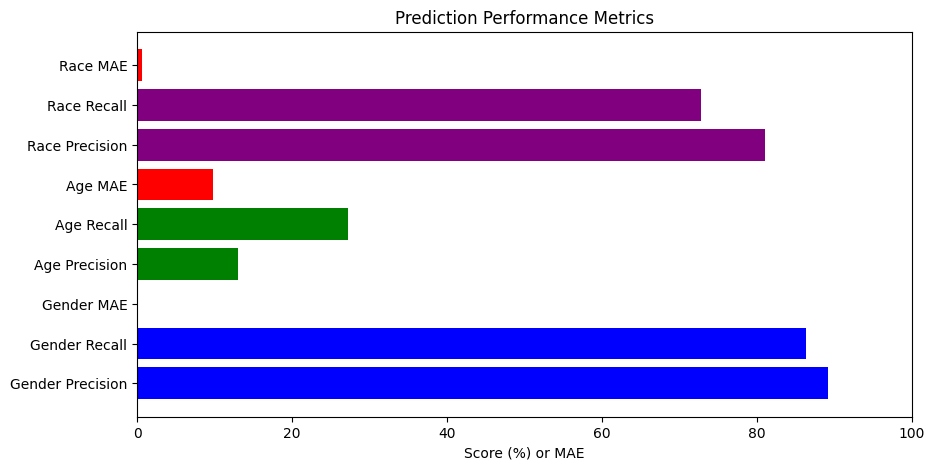

In [19]:
#metrics DataFrame in an interactive table
import matplotlib.pyplot as plt
print(df_metrics)

#plot the metrics
plt.figure(figsize=(10, 5))
plt.barh(df_metrics["Metric"], df_metrics["Score"], color=["blue", "blue", "red", "green", "green", "red", "purple", "purple", "red"])
plt.xlabel("Score (%) or MAE")
plt.title("Prediction Performance Metrics")
plt.xlim(0, 100)
plt.show()

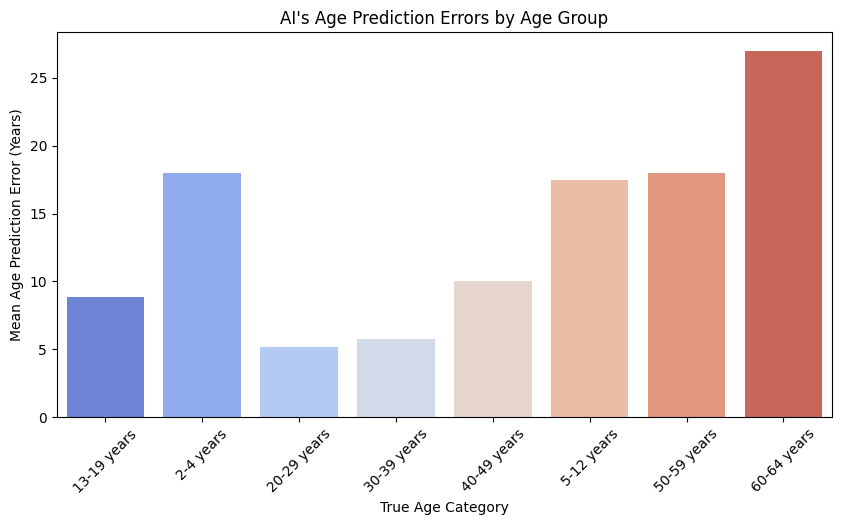

In [20]:
import numpy as np
import seaborn as sns

#compute age prediction errors
df["Age Error"] = abs(df["True Age"] - df["Predicted Age"])

#group errors by age category to see which groups are misclassified most often
age_group_errors = df.groupby("True Age Category")["Age Error"].mean()

#plot the misclassification error for each age group
plt.figure(figsize=(10, 5))
sns.barplot(x=age_group_errors.index, y=age_group_errors.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.xlabel("True Age Category")
plt.ylabel("Mean Age Prediction Error (Years)")
plt.title("AI's Age Prediction Errors by Age Group")
plt.show()

In [21]:
import pandas as pd

#Load the dataset
file_path = "/kaggle/input/humananswers/GoogleForm.csv"
df_responses = pd.read_csv(file_path)

#rename "Отметка времени" to "Participant"
df_responses.rename(columns={"Отметка времени": "Participant"}, inplace=True)

#remove the "Баллы" column if it exists
if "Баллы" in df_responses.columns:
    df_responses.drop(columns=["Баллы"], inplace=True)

#extract the correct answers(last row in the dataset)
correct_answers = df_responses.iloc[-1]

#remove the last row from human responses (to keep only participant answers)
df_human_responses = df_responses.iloc[:-1].reset_index(drop=True)

#create a binary matrix 0 for incorrect, 1 for correct answers
df_binary_results = df_human_responses.apply(lambda row: (row == correct_answers).astype(int), axis=1)

#ensure "Participant" column is not duplicated
if "Participant" in df_binary_results.columns:
    df_binary_results.drop(columns=["Participant"], inplace=True)

#rename Participants as "Participant1", "Participant2", ...
df_binary_results.insert(0, "Participant", [f"Participant{i}" for i in range(len(df_binary_results))])

#save processed dataset
final_file_path = "/kaggle/working/Human_Accuracy_Result.csv"
df_binary_results.to_csv(final_file_path, index=False)

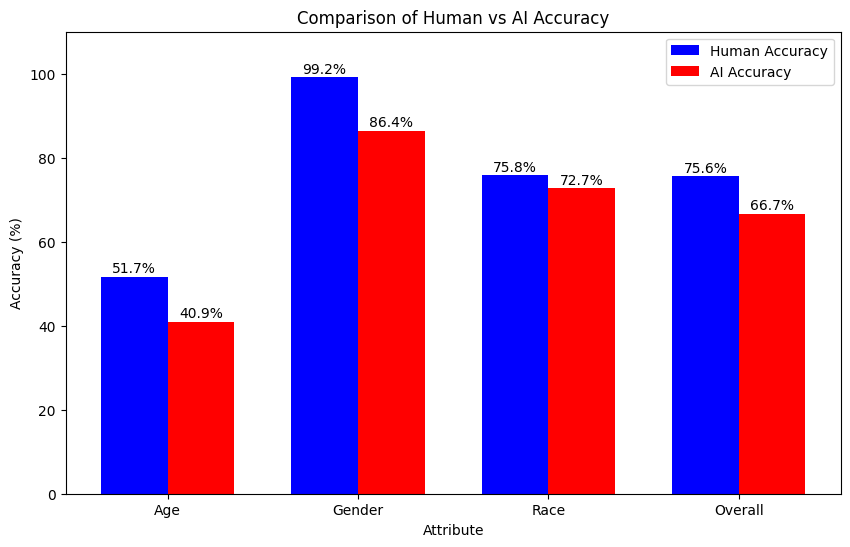

In [22]:
#human survey accuracy file
file_path = "/kaggle/working/Human_Accuracy_Result.csv"

#first row is header
df_human_accuracy = pd.read_csv(file_path, header=0)

df_human_accuracy = df_human_accuracy.set_index(df_human_accuracy.columns[0])

#convert all values to numerical 1 for correct, 0 for incorrect
df_human_accuracy = df_human_accuracy.apply(pd.to_numeric, errors='coerce')

#accuracy for each participant
participant_accuracy = df_human_accuracy.mean(axis=1) * 100

#calculate average accuracy for each category (Age, Gender, Race)
human_age_accuracy = df_human_accuracy.iloc[:, ::3].mean().mean() * 100  #every 3rd column is Age
human_gender_accuracy = df_human_accuracy.iloc[:, 1::3].mean().mean() * 100  #Every 3rd column starting from 1 is Gender
human_race_accuracy = df_human_accuracy.iloc[:, 2::3].mean().mean() * 100  #every 3rd column starting from 2 is Race
human_overall_accuracy = df_human_accuracy.mean().mean() * 100  # Overall acc

#AI accuracy from previous computation
ai_accuracy = {
    "Age": age_category_adjusted_accuracy * 100,
    "Gender": gender_accuracy * 100,
    "Race": race_accuracy * 100,
    "Overall": (age_category_adjusted_accuracy + gender_accuracy  + race_accuracy) / 3 *100 }

#human accuracy result
human_accuracy = {
    "Age": human_age_accuracy,
    "Gender": human_gender_accuracy,
    "Race": human_race_accuracy,
    "Overall": human_overall_accuracy
}

#save cleaned data to a new CSV file
df_human_accuracy.to_csv("/kaggle/working/Cleaned_Human_Accuracy.csv")

#create bar chart comparing Human vs AI accuracy
labels = list(ai_accuracy.keys())
x = np.arange(len(labels))

fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.35

bars1 = ax.bar(x - bar_width/2, human_accuracy.values(), bar_width, label="Human Accuracy", color="blue")
bars2 = ax.bar(x + bar_width/2, ai_accuracy.values(), bar_width, label="AI Accuracy", color="red")

ax.set_xlabel("Attribute")
ax.set_ylabel("Accuracy (%)")
ax.set_title("Comparison of Human vs AI Accuracy")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#values on bars
for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha="center", fontsize=10)

plt.ylim(0, 110)
plt.show()

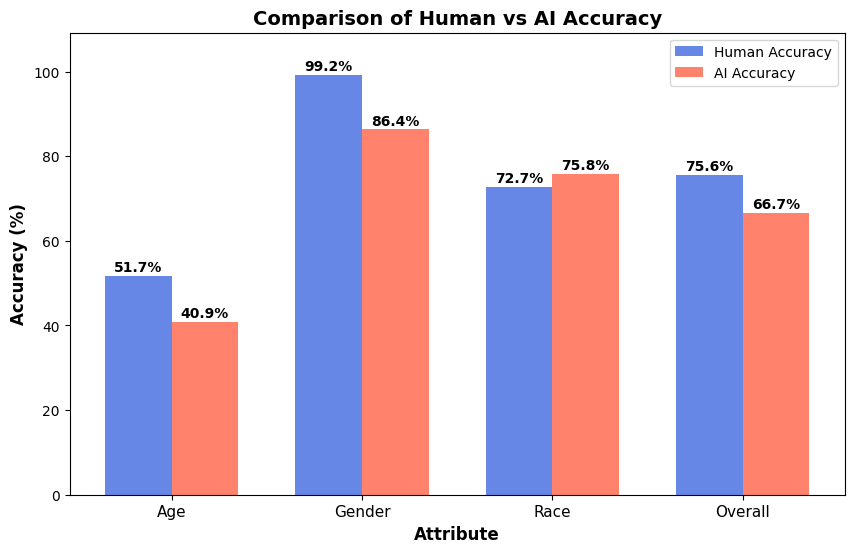

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#extract AI and Human accuracy
df_accuracy = pd.DataFrame({
    "Attribute": ["Age", "Gender", "Race", "Overall"],
    "AI Accuracy (%)": [40.91, 86.36, 75.8 , 66.67],
    "Human Accuracy (%)": [51.7, 99.2, 72.73, 75.6]
})

ai_accuracy = df_accuracy.set_index("Attribute")["AI Accuracy (%)"].to_dict()
human_accuracy = df_accuracy.set_index("Attribute")["Human Accuracy (%)"].to_dict()

#labels for the attributes
labels = list(ai_accuracy.keys())

#create a bar chart
x = np.arange(len(labels))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

#plot bars for human and AI accuracy
bars1 = ax.bar(x - bar_width / 2, human_accuracy.values(), bar_width, label="Human Accuracy", color="royalblue", alpha=0.8)
bars2 = ax.bar(x + bar_width / 2, ai_accuracy.values(), bar_width, label="AI Accuracy", color="tomato", alpha=0.8)

#chart appearance
ax.set_xlabel("Attribute", fontsize=12, fontweight='bold')
ax.set_ylabel("Accuracy (%)", fontsize=12, fontweight='bold')
ax.set_title("Comparison of Human vs AI Accuracy", fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=11)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 1, f"{yval:.1f}%", ha="center", fontsize=10, fontweight='bold')

#y-axis limit dynamically
ax.set_ylim(0, max(max(human_accuracy.values()), max(ai_accuracy.values())) + 10)

plt.show()

In [28]:
#Precision,recall, and MAE for Human participants
human_age_precision = human_age_accuracy 
human_age_recall = human_age_accuracy
human_age_mae = 100 - human_age_accuracy

human_gender_precision = human_gender_accuracy
human_gender_recall = human_gender_accuracy
human_gender_mae = 100 - human_gender_accuracy 

human_race_precision = human_race_accuracy
human_race_recall = human_race_accuracy
human_race_mae = 100 - human_race_accuracy

df_human_metrics = pd.DataFrame({
    "Metric": ["Gender Precision", "Gender Recall", "Gender MAE",
               "Age Precision", "Age Recall", "Age MAE",
               "Race Precision", "Race Recall", "Race MAE"],
    "Score": [human_gender_precision, human_gender_recall, human_gender_mae,
              human_age_precision, human_age_recall, human_age_mae,
              human_race_precision, human_race_recall, human_race_mae]
})

#print Human Accuracy Metrics
print(df_human_metrics)

             Metric      Score
0  Gender Precision  99.166667
1     Gender Recall  99.166667
2        Gender MAE   0.833333
3     Age Precision  51.666667
4        Age Recall  51.666667
5           Age MAE  48.333333
6    Race Precision  75.833333
7       Race Recall  75.833333
8          Race MAE  24.166667


In [36]:
print(f"Human Age Category Prediction Accuracy: {human_age_accuracy/100:.2%}")
print(f"Gender Prediction Accuracy: {human_gender_accuracy/100:.2%}")
print(f"Race Prediction Accuracy: {human_race_accuracy/100:.2%}")

Human Age Category Prediction Accuracy: 51.67%
Gender Prediction Accuracy: 99.17%
Race Prediction Accuracy: 75.83%
